In [1]:
import pandas as pd

In [2]:
book = pd.read_csv(r"C:\Users\srira\Desktop\Ram\Data science\Course - Assignments\Module 15 - Association rules\Dataset\book.csv")
book.head(10)

,ChildBks,YouthBks,CookBks,DoItYBks,RefBks,ArtBks,GeogBks,ItalCook,ItalAtlas,ItalArt,Florence
0,0,1,0,1,0,0,1,0,0,0,0
1,1,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,0
3,1,1,1,0,1,0,1,0,0,0,0
4,0,0,1,0,0,0,1,0,0,0,0
5,1,0,0,0,0,1,0,0,0,0,1
6,0,1,0,0,0,0,0,0,0,0,0
7,0,1,0,0,1,0,0,0,0,0,0
8,1,0,0,1,0,0,0,0,0,0,0
9,1,1,1,0,0,0,1,0,0,0,0


In [6]:
book.shape

(2000, 11)

In [18]:
book_count = []
for type in book.columns:
    book_count.append(book[type].value_counts()[1])
book_count

[846, 495, 862, 564, 429, 482, 552, 227, 74, 97, 217]

In [19]:
#let's try and plot the books on bar plot

Text(0, 0.5, 'No of books')

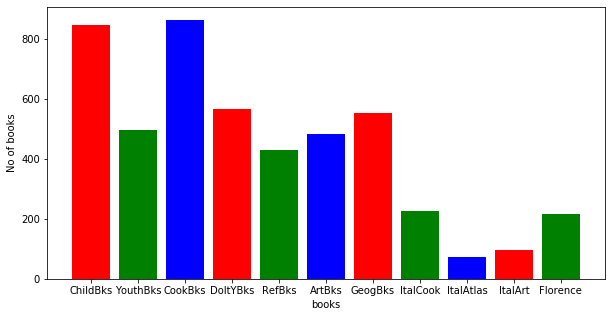

In [22]:
import matplotlib.pyplot as plt
plt.figure(figsize=(10,5))
plt.bar(height=book_count, x=book.columns, color="rgb");plt.xticks(book.columns);plt.xlabel('books');plt.ylabel('No of books')

In [3]:
# The dataset is in binary format so we need not do pre processing

In [4]:
from mlxtend.frequent_patterns import apriori,association_rules

In [9]:
book_rules = apriori(book, min_support=0.01, max_len=3, use_colnames=True)
book_rules

,support,itemsets
0,0.4230,(ChildBks)
1,0.2475,(YouthBks)
2,0.4310,(CookBks)
3,0.2820,(DoItYBks)
4,0.2145,(RefBks)
...,...,...
203,0.0150,"(ItalAtlas, ItalCook, GeogBks)"
204,0.0240,"(ItalArt, ItalCook, GeogBks)"
205,0.0130,"(ItalCook, Florence, GeogBks)"
206,0.0115,"(ItalAtlas, ItalArt, GeogBks)"


In [23]:
book_rules.sort_values('support',ascending=False,inplace=True)
book_rules

,support,itemsets
2,0.4310,(CookBks)
0,0.4230,(ChildBks)
3,0.2820,(DoItYBks)
6,0.2760,(GeogBks)
12,0.2560,"(ChildBks, CookBks)"
...,...,...
170,0.0110,"(ItalArt, RefBks, DoItYBks)"
165,0.0105,"(CookBks, ItalArt, Florence)"
108,0.0105,"(ChildBks, ItalArt, Florence)"
134,0.0100,"(ItalAtlas, GeogBks, YouthBks)"


In [24]:
# Let's plot the top 10 rules based on support criteria

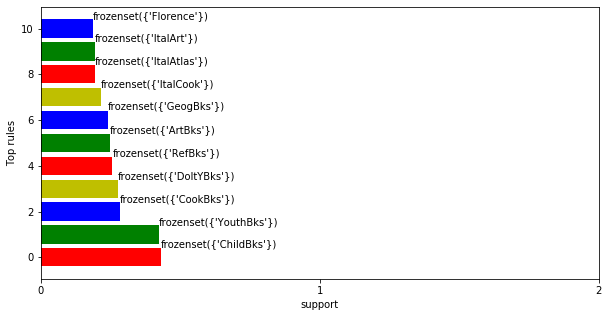

In [33]:
import numpy as np
plt.figure(figsize=(10,5))
plt.barh(y=range(0,11), width =book_rules.support[0:11], color="rgby");plt.ylabel('Top rules');plt.xlabel('support');plt.xticks(range(0,3))
#adding annotations to the bar plot
y = range(0,11)
x = np.array(book_rules.support[0:11])
i = 0
for x,y in zip(x,y):
    while(i<11):
        plt.annotate(book_rules.itemsets[i],(x,y),textcoords="offset points",xytext=(0,10))
        i+=1
        break;
plt.show()

In [34]:
#Final association rules

In [77]:
book_rules_conf = association_rules(book_rules,metric='confidence')
book_rules_conf

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
0,"(ChildBks, RefBks)",(CookBks),0.1515,0.431,0.1225,0.808581,1.876058,0.057204,2.972534
1,"(CookBks, RefBks)",(ChildBks),0.1525,0.423,0.1225,0.803279,1.899004,0.057993,2.933083
2,(ItalCook),(CookBks),0.1135,0.431,0.1135,1.000000,2.320186,0.064582,inf
3,"(DoItYBks, GeogBks)",(CookBks),0.1325,0.431,0.1085,0.818868,1.899926,0.051392,3.141354
4,"(ArtBks, GeogBks)",(CookBks),0.1275,0.431,0.1035,0.811765,1.883445,0.048547,3.022812
...,...,...,...,...,...,...,...,...,...
69,"(ItalAtlas, YouthBks)",(ChildBks),0.0175,0.423,0.0150,0.857143,2.026342,0.007597,4.039000
70,"(ItalAtlas, ItalArt)",(ChildBks),0.0165,0.423,0.0145,0.878788,2.077513,0.007521,4.760250
71,"(ItalArt, Florence)",(ArtBks),0.0125,0.241,0.0125,1.000000,4.149378,0.009488,inf
72,"(ItalArt, Florence)",(CookBks),0.0125,0.431,0.0105,0.840000,1.948956,0.005113,3.556250


In [78]:
book_rules_all = association_rules(book_rules,metric='lift',min_threshold=1)
book_rules_all

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
0,(ChildBks),(CookBks),0.4230,0.4310,0.2560,0.605201,1.404179,0.073687,1.441240
1,(CookBks),(ChildBks),0.4310,0.4230,0.2560,0.593968,1.404179,0.073687,1.421069
2,(ChildBks),(GeogBks),0.4230,0.2760,0.1950,0.460993,1.670264,0.078252,1.343211
3,(GeogBks),(ChildBks),0.2760,0.4230,0.1950,0.706522,1.670264,0.078252,1.966074
4,(CookBks),(GeogBks),0.4310,0.2760,0.1925,0.446636,1.618245,0.073544,1.308361
...,...,...,...,...,...,...,...,...,...
957,"(ItalAtlas, ArtBks)",(DoItYBks),0.0180,0.2820,0.0100,0.555556,1.970055,0.004924,1.615500
958,"(DoItYBks, ArtBks)",(ItalAtlas),0.1235,0.0370,0.0100,0.080972,2.188423,0.005431,1.047846
959,(ItalAtlas),"(DoItYBks, ArtBks)",0.0370,0.1235,0.0100,0.270270,2.188423,0.005431,1.201130
960,(DoItYBks),"(ItalAtlas, ArtBks)",0.2820,0.0180,0.0100,0.035461,1.970055,0.004924,1.018103


In [79]:
book_rules_all.sort_values('lift',ascending=False,inplace=True)
book_rules_all.head(10)

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
764,"(ItalArt, RefBks)",(ItalAtlas),0.0200,0.0370,0.0165,0.825000,22.297297,0.015760,5.502857
765,(ItalAtlas),"(ItalArt, RefBks)",0.0370,0.0200,0.0165,0.445946,22.297297,0.015760,1.768780
754,(ItalArt),"(ItalAtlas, ArtBks)",0.0485,0.0180,0.0165,0.340206,18.900344,0.015627,1.488344
751,"(ItalAtlas, ArtBks)",(ItalArt),0.0180,0.0485,0.0165,0.916667,18.900344,0.015627,11.418000
355,(ItalArt),"(ItalCook, ArtBks)",0.0485,0.0565,0.0375,0.773196,13.684883,0.034760,4.159977
354,"(ItalCook, ArtBks)",(ItalArt),0.0565,0.0485,0.0375,0.663717,13.684883,0.034760,2.829461
562,"(RefBks, ItalCook)",(ItalAtlas),0.0465,0.0370,0.0230,0.494624,13.368207,0.021279,1.905511
563,(ItalAtlas),"(RefBks, ItalCook)",0.0370,0.0465,0.0230,0.621622,13.368207,0.021279,2.519964
921,"(ItalAtlas, GeogBks)",(ItalArt),0.0205,0.0485,0.0115,0.560976,11.566507,0.010506,2.167306
924,(ItalArt),"(ItalAtlas, GeogBks)",0.0485,0.0205,0.0115,0.237113,11.566507,0.010506,1.283939


In [80]:
book_rules_conf.sort_values('confidence',ascending=False,inplace=True)
book_rules_conf.head(10)

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
25,"(ItalCook, RefBks)",(CookBks),0.0465,0.4310,0.0465,1.0,2.320186,0.026458,inf
20,"(ItalCook, YouthBks)",(CookBks),0.0590,0.4310,0.0590,1.0,2.320186,0.033571,inf
22,"(ItalCook, ArtBks)",(CookBks),0.0565,0.4310,0.0565,1.0,2.320186,0.032148,inf
24,(ItalArt),(ArtBks),0.0485,0.2410,0.0485,1.0,4.149378,0.036812,inf
51,"(ItalArt, RefBks)",(ArtBks),0.0200,0.2410,0.0200,1.0,4.149378,0.015180,inf
57,"(ItalAtlas, ArtBks)",(RefBks),0.0180,0.2145,0.0180,1.0,4.662005,0.014139,inf
28,"(CookBks, ItalArt)",(ArtBks),0.0410,0.2410,0.0410,1.0,4.149378,0.031119,inf
32,"(ItalArt, ItalCook)",(ArtBks),0.0375,0.2410,0.0375,1.0,4.149378,0.028463,inf
34,"(ItalArt, ItalCook)",(CookBks),0.0375,0.4310,0.0375,1.0,2.320186,0.021337,inf
35,(ItalAtlas),(RefBks),0.0370,0.2145,0.0370,1.0,4.662005,0.029063,inf


In [81]:
book_rules_conf['antecedents'] = book_rules_conf['antecedents'].apply(lambda x:', '.join(list(x))).astype("unicode")
book_rules_conf['consequents'] = book_rules_conf['consequents'].apply(lambda x:', '.join(list(x))).astype("unicode")
book_rules_all['antecedents'] = book_rules_all['antecedents'].apply(lambda x:', '.join(list(x))).astype("unicode")
book_rules_all['consequents'] = book_rules_all['consequents'].apply(lambda x:', '.join(list(x))).astype("unicode")
book_rules_all

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
764,"ItalArt, RefBks",ItalAtlas,0.0200,0.0370,0.0165,0.825000,22.297297,0.015760,5.502857
765,ItalAtlas,"ItalArt, RefBks",0.0370,0.0200,0.0165,0.445946,22.297297,0.015760,1.768780
754,ItalArt,"ItalAtlas, ArtBks",0.0485,0.0180,0.0165,0.340206,18.900344,0.015627,1.488344
751,"ItalAtlas, ArtBks",ItalArt,0.0180,0.0485,0.0165,0.916667,18.900344,0.015627,11.418000
355,ItalArt,"ItalCook, ArtBks",0.0485,0.0565,0.0375,0.773196,13.684883,0.034760,4.159977
...,...,...,...,...,...,...,...,...,...
300,ChildBks,Florence,0.4230,0.1085,0.0485,0.114657,1.056748,0.002605,1.006955
417,Florence,DoItYBks,0.1085,0.2820,0.0315,0.290323,1.029513,0.000903,1.011727
416,DoItYBks,Florence,0.2820,0.1085,0.0315,0.111702,1.029513,0.000903,1.003605
307,Florence,CookBks,0.1085,0.4310,0.0475,0.437788,1.015749,0.000737,1.012074


In [82]:
#Putting together antecendent & consequent for annotations
ant_cons = []
for i in book_rules_all.index:
    j = i
    while(i<len(book_rules_all.antecedents)):
        while(j<len(book_rules_all.consequents)):
            ant_cons.append("("+book_rules_all.antecedents[i] +") & ("+ book_rules_all.consequents[j]+")")
            break
        break    
ant_cons[:11]

['(ItalArt, RefBks) & (ItalAtlas)',
 '(ItalAtlas) & (ItalArt, RefBks)',
 '(ItalArt) & (ItalAtlas, ArtBks)',
 '(ItalAtlas, ArtBks) & (ItalArt)',
 '(ItalArt) & (ItalCook, ArtBks)',
 '(ItalCook, ArtBks) & (ItalArt)',
 '(RefBks, ItalCook) & (ItalAtlas)',
 '(ItalAtlas) & (RefBks, ItalCook)',
 '(ItalAtlas, GeogBks) & (ItalArt)',
 '(ItalArt) & (ItalAtlas, GeogBks)',
 '(ItalAtlas, ItalCook) & (ItalArt)']

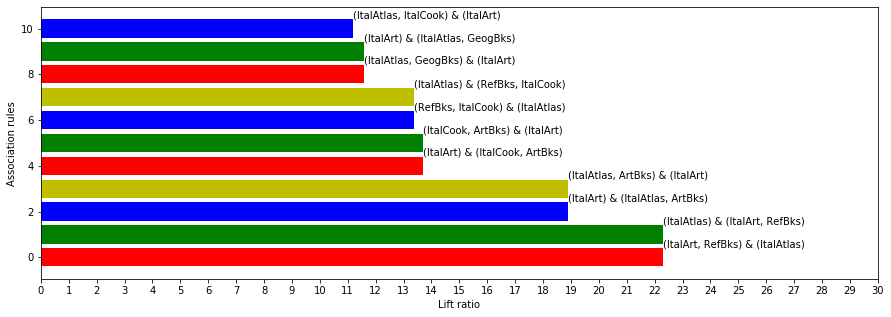

In [83]:
plt.figure(figsize=(15,5))
plt.barh(y=range(0,11), width =book_rules_all.lift[0:11], color="rgby");plt.ylabel('Association rules');plt.xlabel('Lift ratio');plt.xticks(range(0,31))
#adding annotations to the bar plot
y = range(0,11)
x = np.array(book_rules_all.lift[0:11])
i = 0
for x,y in zip(x,y):
    while(i<11):
        plt.annotate(ant_cons[i],(x,y),textcoords="offset points",xytext=(0,10))
        i+=1
        break;
plt.show()

In [52]:
#Plotting using confidence matrix

In [84]:
#Putting together antecendent & consequent for annotations
ant_cons = []
for i in book_rules_conf.index:
    j = i
    while(i<len(book_rules_conf.antecedents)):
        while(j<len(book_rules_conf.consequents)):
            ant_cons.append("("+book_rules_conf.antecedents[i] +") & ("+ book_rules_conf.consequents[j]+")")
            break
        break    
ant_cons[:11]

['(ItalCook, RefBks) & (CookBks)',
 '(ItalCook, YouthBks) & (CookBks)',
 '(ItalCook, ArtBks) & (CookBks)',
 '(ItalArt) & (ArtBks)',
 '(ItalArt, RefBks) & (ArtBks)',
 '(ItalAtlas, ArtBks) & (RefBks)',
 '(CookBks, ItalArt) & (ArtBks)',
 '(ItalArt, ItalCook) & (ArtBks)',
 '(ItalArt, ItalCook) & (CookBks)',
 '(ItalAtlas) & (RefBks)',
 '(ChildBks, ItalArt) & (ArtBks)']

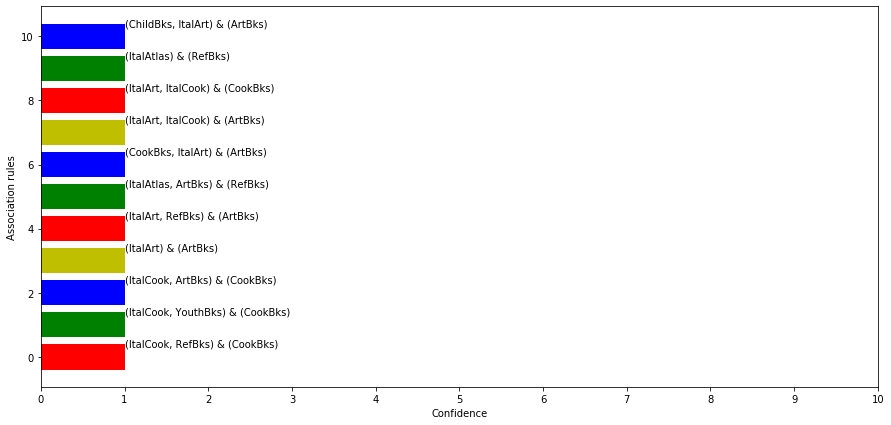

In [86]:
plt.figure(figsize=(15,7))
plt.barh(y=range(0,11), width =book_rules_conf.confidence[0:11], color="rgby");plt.ylabel('Association rules');plt.xlabel('Confidence');plt.xticks(range(0,11))
#adding annotations to the bar plot
y = range(0,11)
x = np.array(book_rules_conf.confidence[0:11])
i = 0
for x,y in zip(x,y):
    while(i<11):
        plt.annotate(ant_cons[i],(x,y),textcoords="offset points",xytext=(0,10))
        i+=1
        break;
plt.show()

In [38]:
help(apriori)

Help on function apriori in module mlxtend.frequent_patterns.apriori:

apriori(df, min_support=0.5, use_colnames=False, max_len=None, verbose=0, low_memory=False)
    Get frequent itemsets from a one-hot DataFrame
    
    Parameters
    -----------
    df : pandas DataFrame
      pandas DataFrame the encoded format. Also supports
      DataFrames with sparse data; for more info, please
      see (https://pandas.pydata.org/pandas-docs/stable/
           user_guide/sparse.html#sparse-data-structures)
    
      Please note that the old pandas SparseDataFrame format
      is no longer supported in mlxtend >= 0.17.2.
    
      The allowed values are either 0/1 or True/False.
      For example,
    
    ```
             Apple  Bananas   Beer  Chicken   Milk   Rice
        0     True    False   True     True  False   True
        1     True    False   True    False  False   True
        2     True    False   True    False  False  False
        3     True     True  False    False  False  Fa